In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

df = pd.read_csv('job-fit.csv')
df.head()

,age,education,experience,selected
0,24,1.0,2,0
1,35,3.5,8,1
2,23,1.0,1,0
3,35,3.0,7,1
4,45,1.0,10,0


In [2]:
x = df[['age', 'education', 'experience']]
y = df['selected']

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [4]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [5]:
y_pred = LR.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1])

<Axes: xlabel='Predicted', ylabel='Actual'>

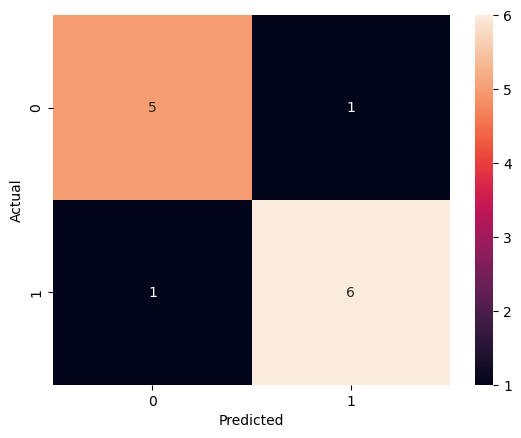

In [7]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [8]:
print('Accuracy Score: ', metrics.accuracy_score(y_test, y_pred))

Accuracy Score:  0.8461538461538461


#### Reject Candidate

In [18]:
new_candidate = {
    'age': [25],
    'education': [1],
    'experience': [5]
}
new_df = pd.DataFrame(new_candidate, columns=['age', 'education', 'experience'])
new_df

,age,education,experience
0,25,1,5


In [19]:
y_new_pred = LR.predict(new_df)
y_new_pred

array([0])

#### Accept Candidate

In [20]:
new_candidate = {
    'age': [25],
    'education': [3],
    'experience': [5]
}
new_df = pd.DataFrame(new_candidate, columns=['age', 'education', 'experience'])
new_df

,age,education,experience
0,25,3,5


In [21]:
y_new_pred = LR.predict(new_df)
y_new_pred

array([1])